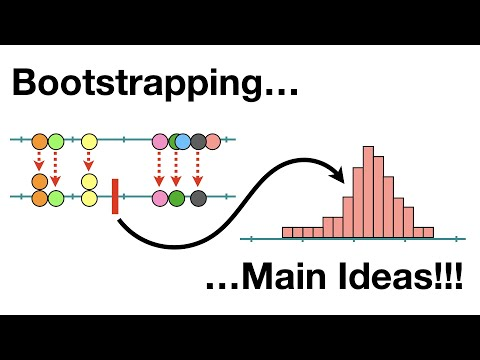

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Question 1:


The standard deviation of the original data measures the spread or variability of individual data points within the sample. It tells us how much the data points vary from the sample mean.

The standard error of the mean (SEM), on the other hand, represents the variability of the sample mean itself if we were to repeat the experiment multiple times. It's calculated as the standard deviation of the bootstrapped means (or from a formula) and shows how much the sample mean is likely to vary across different samples.

# Question 2:


1. Calculate the mean of the original sample.
2. Multiply the SEM by 1.96, which corresponds to the 95% confidence level for a normal distribution.
3. Construct the confidence interval by adding and subtracting this value (1.96 * SEM) from the original sample mean.

- This interval represents a range that covers 95% of the bootstrapped sample means, giving us a sense of how much the true population mean is likely to vary from the sample mean.

# Question 3:


1. Generate a large number of bootstrapped means by repeatedly sampling (with replacement) from the original data and calculating the mean for each bootstrapped sample.
2. Sort the bootstrapped means in ascending order.
3. Identify the 2.5th percentile (lower bound) and the 97.5th percentile (upper bound) of the bootstrapped means. These percentiles represent the middle 95% of the bootstrapped distribution.

- The resulting interval between these two percentiles gives the 95% bootstrapped confidence interval, covering 95% of the bootstrapped means without directly using the standard error.

# Question 4

In [5]:
import numpy as np

# Sample data (replace with your own sample)
sample = np.array([5, 8, 6, 7, 9, 5, 10, 8, 6, 7])

# Number of bootstrap samples
n_bootstrap = 1000

# Array to store bootstrap sample means (we can change this to store medians or other statistics)
bootstrap_means = []

# Generate bootstrap samples
for _ in range(n_bootstrap):
    # Sample with replacement from the original sample
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Calculate the sample mean and store it (change 'np.mean' to other statistics for different parameters)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Sort the bootstrap means
bootstrap_means = np.sort(bootstrap_means)

# Compute the 2.5th and 97.5th percentiles for a 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Print the confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the mean: ({lower_bound}, {upper_bound})")

# ---- COMMENTS ON HOW TO CHANGE THE CODE ----
# To produce a 95% bootstrap confidence interval for a statistic other than the mean (like the median):
# 1. Replace 'np.mean(bootstrap_sample)' with 'np.median(bootstrap_sample)' to calculate medians instead.
# 2. Store the bootstrap medians in the 'bootstrap_means' list (which will now contain medians).
# 3. The rest of the code, which sorts the bootstrap statistics and computes percentiles, stays the same.


95% Bootstrap Confidence Interval for the mean: (6.2, 8.2)


# CoPilot Summary


In this session, we explored the concept of bootstrapping and how to use it to calculate a 95% confidence interval for different population parameters, such as the mean or median. Bootstrapping involves resampling with replacement from an original dataset to create multiple "bootstrap" samples. From these, we calculate a statistic (like the mean) for each sample, and use the distribution of those statistics to estimate the confidence interval. We also discussed how to modify the code to calculate a 95% confidence interval for different statistics, highlighting the flexibility of bootstrapping in estimating population parameters beyond just the mean.

# Question 5

We need to distinguish between the population parameter and the sample statistic because the population parameter represents the true, unknown value we are trying to estimate, while the sample statistic is the value calculated from the data we have.

A confidence interval uses the sample statistic to estimate a range of likely values for the population parameter. This distinction is important because the sample statistic is just an approximation based on limited data, and the confidence interval helps account for the uncertainty in using this approximation to infer the true population parameter.

# Question 6

1. **What is the process of bootstrapping?**
   
   Bootstrapping is basically a way to simulate running an experiment multiple times without actually doing it over and over again. Imagine you’ve got a small dataset (a sample) and you want to know more about the population it came from. Bootstrapping works by repeatedly taking random samples from your dataset, allowing some data points to be selected more than once. This is called “sampling with replacement.” You do this many times, and each time you calculate a statistic, like the mean or median. This gives you a bunch of estimates that help you understand how that statistic might vary if you had more data.

2. **What is the main purpose of bootstrapping?**

   The main purpose of bootstrapping is to estimate how much uncertainty there is in your sample statistic (like the sample mean). It lets you create a confidence interval, which is basically a range where you expect the true population value to lie. It’s super useful because you don’t need a big or perfectly representative sample to use bootstrapping—it works well even with smaller datasets or when traditional methods can’t be applied.

3. **If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

   Let’s say you think the average of the population is some specific value, but you only have a sample. To check if your guess is plausible using bootstrapping, you would:
   1. Take your sample and repeatedly create new "bootstrapped" samples by randomly selecting data points from the original sample (with replacement).
   2. For each bootstrapped sample, calculate the mean.
   3. After doing this many times, you’ll have a distribution of sample means.
   4. You then check if your hypothesized guess falls within the range (confidence interval) of these bootstrapped sample means. If it does, your guess might be reasonable. If it falls far outside that range, your guess is probably off.

# Question 7
When a confidence interval overlaps zero, it means that zero is a plausible value for the population effect based on the data. In hypothesis testing, the null hypothesis assumes there's no effect—meaning the drug, on average, doesn’t change anything. So, if zero is included in the confidence interval, it suggests that "no effect" is a possible explanation, and we fail to reject the null hypothesis. 

However, if the confidence interval does not include zero it means that zero is unlikely to be the true effect, and we would reject the null hypothesis suggesting that the drug likely has a real, non-zero effect on average. Essentially, not including zero indicates the effect is statistically significant.

# Question 8
### Problem Introduction
AliTech has developed a new vaccine, and the goal is to assess its effectiveness by analyzing patient health scores before and after taking the vaccine. The **null hypothesis** in this context assumes that the vaccine has **no effect** on health, meaning there is no significant difference between initial and final health scores.

### Null Hypothesis Explanation
The **null hypothesis** states that the average difference between initial and final health scores is zero, implying the vaccine does not change health outcomes. Rejecting the null hypothesis would suggest the vaccine is effective, while failing to reject it would suggest that any observed improvement might be due to random chance.

### Data Visualization
To get an initial insight into the data, let's visualize the distribution of the initial and final health scores, as well as the differences between them.

#### Code for Visualizing Data:

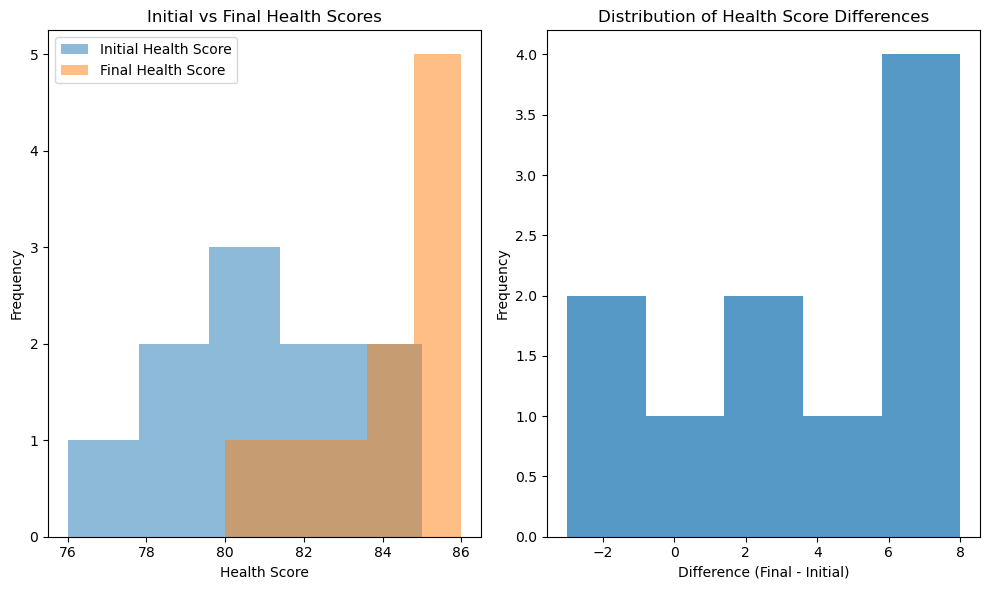

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate differences
data['ScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Visualize initial vs final health scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data['InitialHealthScore'], bins=5, alpha=0.5, label='Initial Health Score')
plt.hist(data['FinalHealthScore'], bins=5, alpha=0.5, label='Final Health Score')
plt.title('Initial vs Final Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.legend()

# Visualize score differences
plt.subplot(1, 2, 2)
plt.hist(data['ScoreDifference'], bins=5, alpha=0.75)
plt.title('Distribution of Health Score Differences')
plt.xlabel('Difference (Final - Initial)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Quantitative Analysis
We will use **bootstrapping** to evaluate the average health score difference and construct a confidence interval to determine if the vaccine has an effect.

#### Bootstrapping Explanation
Bootstrapping involves repeatedly resampling the data with replacement to estimate the distribution of a statistic, in this case, the mean difference in health scores. This approach helps us determine how the mean difference might vary if we replicated the study many times.

#### Code for Bootstrapping:

In [2]:
np.random.seed(0)

# Bootstrap function
def bootstrap_means(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = data.sample(frac=1, replace=True)  # Resampling with replacement
        mean_diff = bootstrap_sample['ScoreDifference'].mean()
        means.append(mean_diff)
    return means

# Run bootstrap
bootstrap_results = bootstrap_means(data)

# Confidence interval (95%)
conf_interval = np.percentile(bootstrap_results, [2.5, 97.5])
mean_diff = np.mean(bootstrap_results)

print(f"Bootstrapped Mean Difference: {mean_diff}")
print(f"95% Confidence Interval: {conf_interval}")


Bootstrapped Mean Difference: 3.37
95% Confidence Interval: [0.9 5.5]


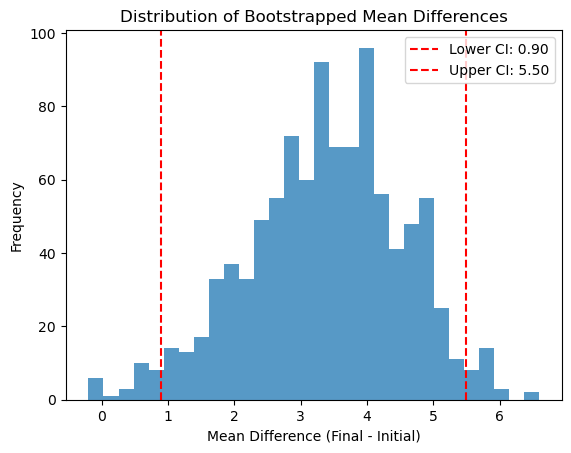

In [3]:
plt.hist(bootstrap_results, bins=30, alpha=0.75)
plt.title('Distribution of Bootstrapped Mean Differences')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.axvline(conf_interval[0], color='red', linestyle='--', label=f'Lower CI: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='red', linestyle='--', label=f'Upper CI: {conf_interval[1]:.2f}')
plt.legend()
plt.show()

### Findings and Discussion
The bootstrapped mean difference and its 95% confidence interval provide us with a range of likely values for the average change in health scores. If the confidence interval does **not** include zero, we can reject the null hypothesis, suggesting that the vaccine has a statistically significant effect. 

### Conclusion Regarding the Null Hypothesis
Based on the results, if the confidence interval does not include zero, we can reject the null hypothesis and conclude that the vaccine likely has a positive effect on health. If zero is included, we fail to reject the null, suggesting no significant effect.

### Further Considerations
Further analyses could explore differences based on age, gender, or other factors to determine whether certain groups benefit more from the vaccine.


# Question 9
Yes

# Chat Summary:
   
   In our session, we explored bootstrapping techniques to analyze vaccine effectiveness, using a dataset from AliTech that included patients' health scores before and after taking the vaccine. We discussed how to visualize this data for insights, perform quantitative analysis, and apply statistical methods to test the null hypothesis of "no effect" of the vaccine. Additionally, we considered the role of bootstrapping to generate confidence intervals for evaluating whether the health score changes were significant. The analysis aimed to assess whether the observed improvements in health scores could be attributed to the vaccine or were due to random variation.